In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('../../data/biofuel-production.csv')

## Data Description



In [3]:
print(f"File containd NaN-values: {df.isnull().values.any()}")
df.head()

File containd NaN-values: True


,Entity,Code,Year,Biofuels production - TWh
0,Africa (EI),NaN,1990,0.305102
1,Africa (EI),NaN,1991,0.305102
2,Africa (EI),NaN,1992,0.305290
3,Africa (EI),NaN,1993,0.068617
4,Africa (EI),NaN,1994,0.068617


In [4]:
df.columns

Index(['Entity', 'Code', 'Year', 'Biofuels production - TWh'], dtype='object')

**Entity**: country (categirical)

**Code**: Country code (categorical)

**Year**: (numerical)

**Biofuels production - TWh**: energy generated from biofuels, measured in terawatt-hours (numerical)

In [5]:
df['Biofuels production - TWh'].describe()

count    1134.000000
mean       87.256907
std       160.247639
min         0.000000
25%         1.894032
50%        16.540880
75%        93.439810
max      1187.204300
Name: Biofuels production - TWh, dtype: float64

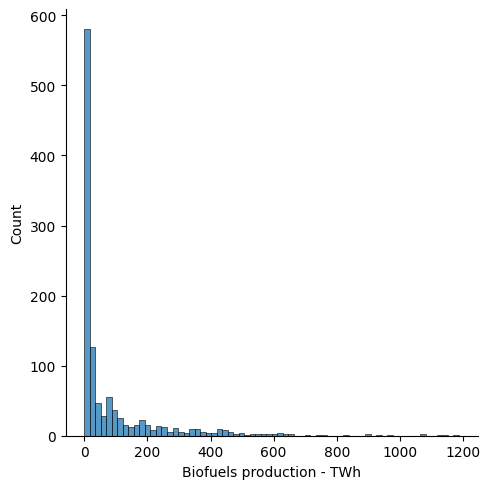

In [6]:
sns.displot(df['Biofuels production - TWh'])

In [7]:
#skewness and kurtosis
print(df['Biofuels production - TWh'].skew())
print(df['Biofuels production - TWh'].kurtosis())

3.055522742248494
11.74257852888138


In [8]:
entity_mean = df.groupby('Entity')['Biofuels production - TWh'].mean().reset_index()

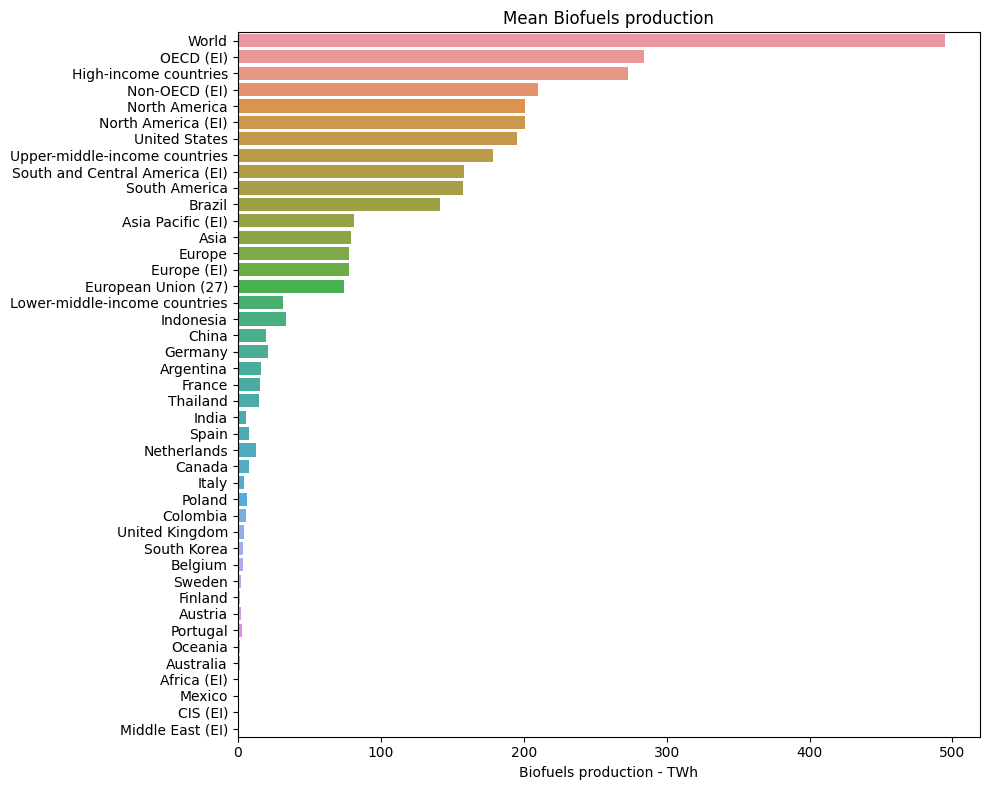

In [9]:
sorted_data = df.sort_values(by='Biofuels production - TWh', ascending=False)

# Create the bar plot
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.barplot(x='Biofuels production - TWh', y='Entity', data=sorted_data, ci=None)
fig.set(xlabel='Biofuels production - TWh', ylabel='', title='Mean Biofuels production')

plt.tight_layout()
plt.show()

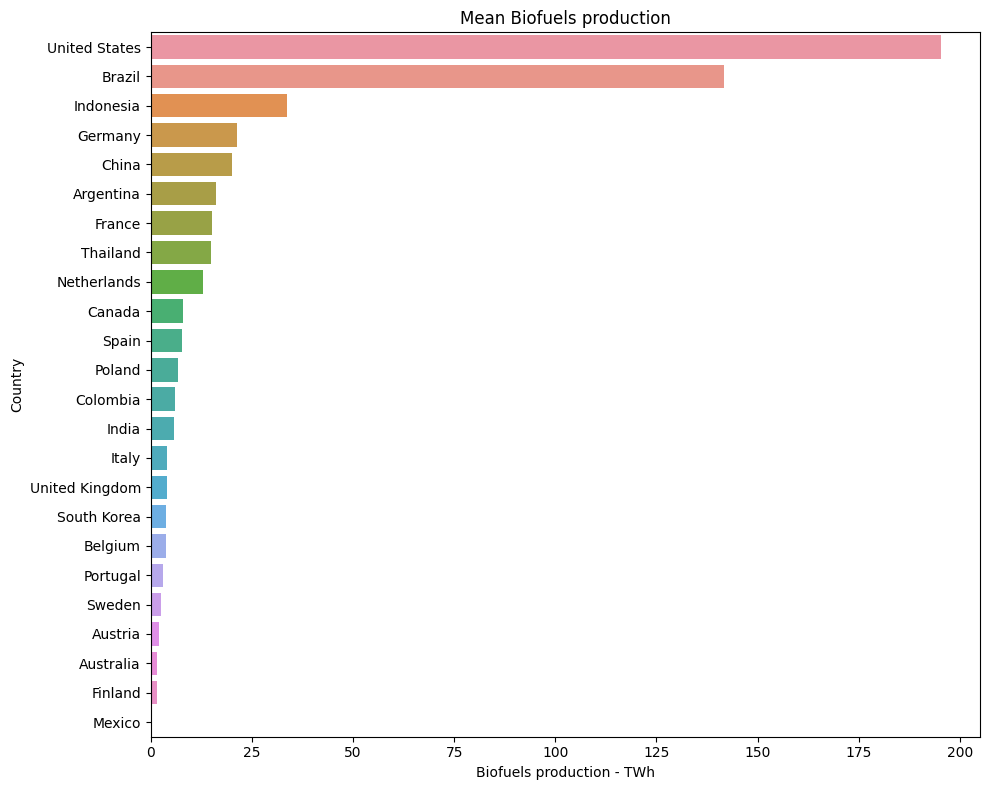

In [15]:
subset_df = df.dropna(subset=['Code'])
subset_df = subset_df[subset_df['Entity'].str.strip() != 'World']
country_sub_df = subset_df.groupby('Entity')['Biofuels production - TWh'].mean().reset_index()
sorted_subset = country_sub_df.sort_values(by='Biofuels production - TWh', ascending=False)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.barplot(x='Biofuels production - TWh', y='Entity', data=sorted_subset, ci=None)
fig.set(xlabel='Biofuels production - TWh', ylabel='Country', title='Mean Biofuels production')
plt.tight_layout()
plt.show()